# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, make_scorer
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, learning_curve


In [73]:
df = pd.read_csv('diabetes.csv')

X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [74]:
def plot_learning_curve(model, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=stratified_kfold, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.plot(train_sizes, train_scores_mean, label='Training Score')
    plt.plot(train_sizes, test_scores_mean, label='Cross-validation Score')
    plt.title(title)
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.grid()
    plt.legend()
    
    plt.show()

In [75]:
ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, learning_rate=0.1)
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
ada_acc = accuracy_score(y_test, ada_pred)

print("AdaBoost Accuracy: ", ada_acc)

AdaBoost Accuracy:  0.9221835075493612


c:\Users\Uliana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


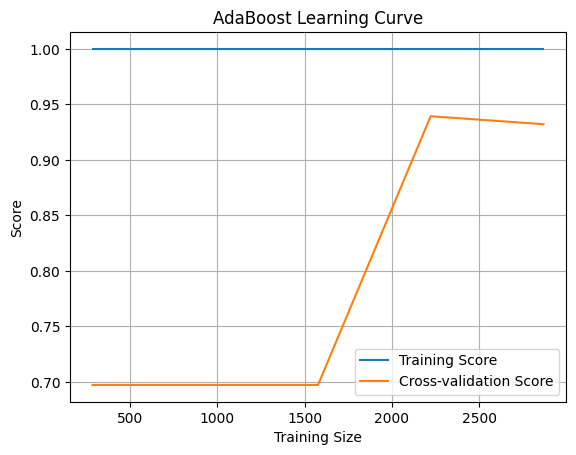

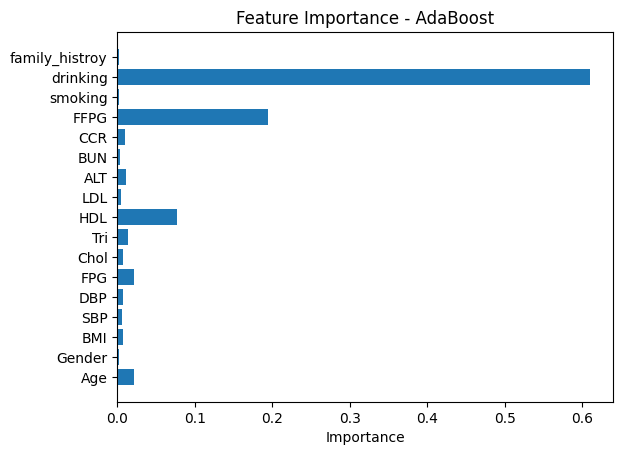

In [76]:
plot_learning_curve(ada_model, 'AdaBoost Learning Curve')

ada_importances = ada_model.feature_importances_
plt.barh(X.columns, ada_importances)
plt.title('Feature Importance - AdaBoost')
plt.xlabel('Importance')

plt.show()

In [77]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)

print("Gradient Boosting Accuracy: ", gb_acc)

Gradient Boosting Accuracy:  0.9442508710801394


c:\Users\Uliana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
9 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Uliana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Uliana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Uliana\AppD

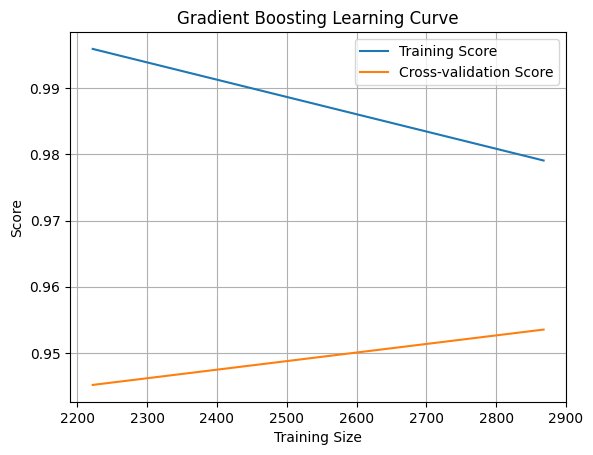

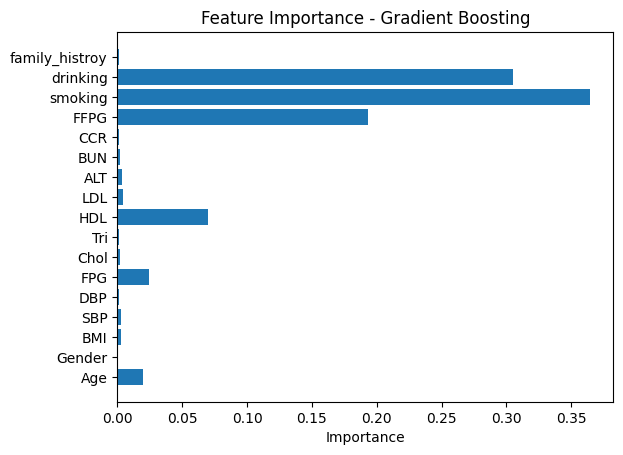

In [78]:
plot_learning_curve(gb_model, 'Gradient Boosting Learning Curve')

gb_importances = gb_model.feature_importances_
plt.barh(X.columns, gb_importances)
plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Importance')

plt.show()

In [79]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.6, 0.8, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=stratified_kfold, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

print("Best parameters for XGBoost: ", grid_search_xgb.best_params_)

Best parameters for XGBoost:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.6}


In [80]:
xgb_model = XGBClassifier(**grid_search_xgb.best_params_)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy: ", xgb_acc)

XGBoost Accuracy:  0.943089430894309


c:\Users\Uliana\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


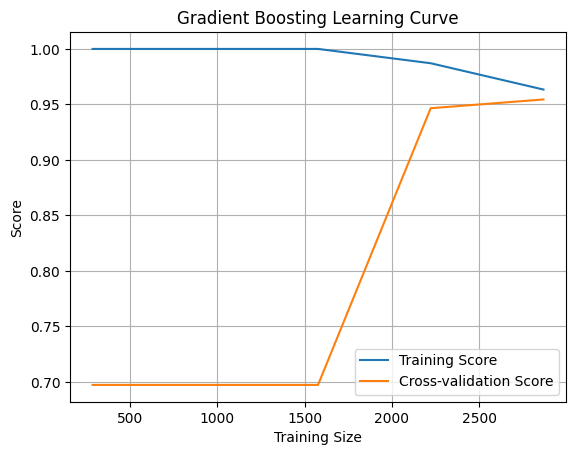

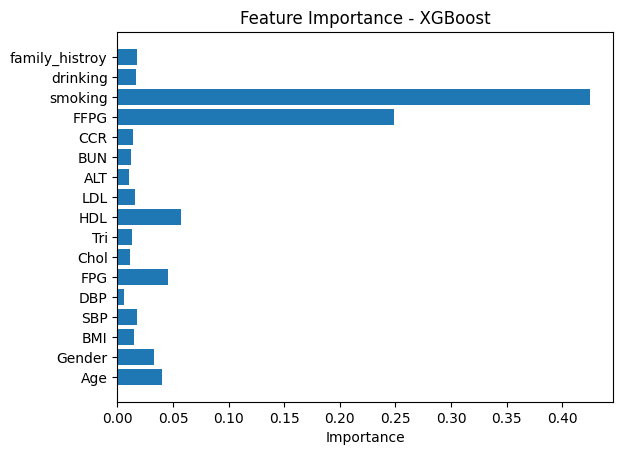

In [81]:
plot_learning_curve(xgb_model, 'Gradient Boosting Learning Curve')

xgb_importances = xgb_model.feature_importances_
plt.barh(X.columns, xgb_importances)
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance')

plt.show()

In [82]:
xgb_model_reg = XGBClassifier(n_estimators=100,
                              learning_rate=0.1,
                              max_depth=3,
                              reg_alpha=0.1,
                              reg_lambda=0.1)
xgb_model_reg.fit(X_train, y_train)

xgb_reg_pred = xgb_model_reg.predict(X_test)
xgb_reg_acc = accuracy_score(y_test, xgb_reg_pred)
print("XGBoost with regularization Accuracy: ", xgb_reg_acc)

XGBoost with regularization Accuracy:  0.9454123112659698


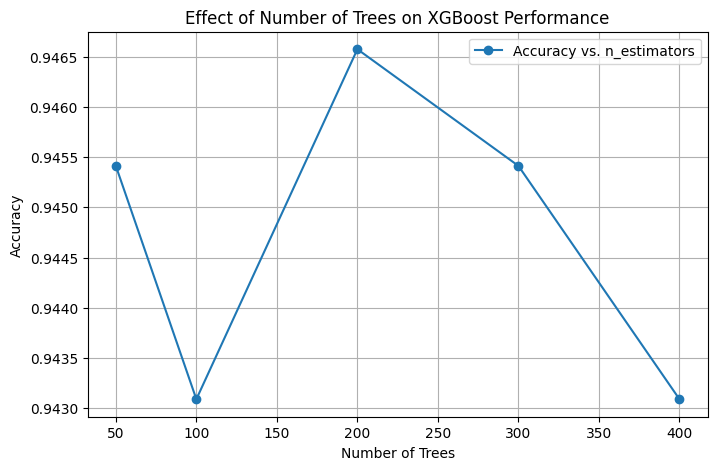

In [83]:
n_estimators_list = [50, 100, 200, 300, 400]
xgb_accuracies = []

for n in n_estimators_list:
    temp_model = XGBClassifier(n_estimators=n, learning_rate=0.1, max_depth=3)
    temp_model.fit(X_train, y_train)
    temp_pred = temp_model.predict(X_test)
    xgb_accuracies.append(accuracy_score(y_test, temp_pred))

plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, xgb_accuracies, marker='o', label='Accuracy vs. n_estimators')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Effect of Number of Trees on XGBoost Performance')
plt.legend()
plt.grid(True)
plt.show()

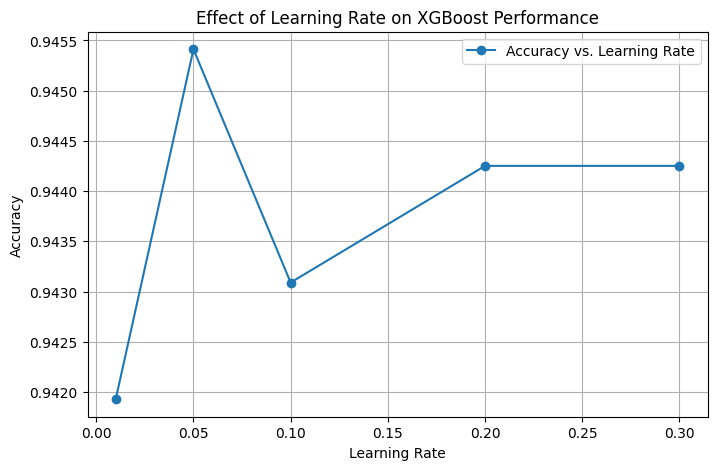

In [84]:
learning_rate_list = [0.01, 0.05, 0.1, 0.2, 0.3]
xgb_lr_accuracies = []

for lr in learning_rate_list:
    temp_model = XGBClassifier(n_estimators=100, learning_rate=lr, max_depth=3)
    temp_model.fit(X_train, y_train)
    temp_pred = temp_model.predict(X_test)
    xgb_lr_accuracies.append(accuracy_score(y_test, temp_pred))

plt.figure(figsize=(8, 5))
plt.plot(learning_rate_list, xgb_lr_accuracies, marker='o', label='Accuracy vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Effect of Learning Rate on XGBoost Performance')
plt.legend()
plt.grid(True)
plt.show()

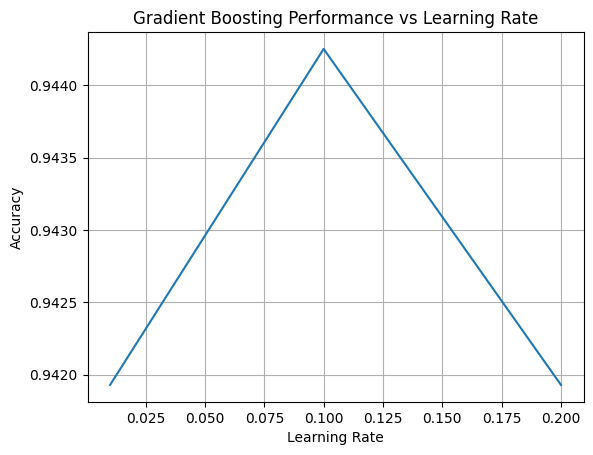

In [85]:
def plot_hyperparameter_dependency(param_name, param_range, scores, model_name):
    plt.plot(param_range, scores)
    plt.title(f'{model_name} Performance vs {param_name}')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.grid()
    
    plt.show()

learning_rates = param_grid['learning_rate']
learning_rate_scores = []

for lr in learning_rates:
    model = GradientBoostingClassifier(n_estimators=100, learning_rate=lr, max_depth=3)
    model.fit(X_train, y_train)
    score = accuracy_score(y_test, model.predict(X_test))
    learning_rate_scores.append(score)

plot_hyperparameter_dependency('Learning Rate', learning_rates, learning_rate_scores, 'Gradient Boosting')

- Було оцінено три бустінг моделі: `AdaBoost`, `Gradient Boosting` і `XGBoost` на підготовленому датасеті `diabetes.csv`.

- Точність AdaBoost складає `0.9152`, Gradient Boosting `0.9442`, XGBoost `0.9430` (з точністю регуляризації вийшло `0.9454`)

- Результати моделі Gradient Boosting виявилися найвищими, після чого йде XGBoost з невеликим відривом (якщо враховувати показник з точністю регуляризації, то дана модель має найкращі результати) і AdaBoost.

- Для моделі XGBoost було застосовано регулярізацію, що трохи покращило точність порівняно з стандартною моделлю XGBoost. Ефект регулярізації може все ж відрізнятися залежно від моделі та датасету, тобто, якщо модель недостатньо підходить або коли набір даних простий, застосування регулярізації може тільки погіршити продуктивність через надмірне обмеження моделі.

- Серед оцінених моделей `Gradient Boosting` вважається найкращим варіантом. Він досяг найвищої точності та продемонстрував хороший баланс між зміщенням і дисперсією. Здатність фіксувати складні шаблони в даних робить його придатним для даної класифікації.